# Project 3
### Objective: To load Iowa statewide alcohol sales data and predict revenue using linear regression.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import math
%matplotlib inline
from __future__ import division
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import r2_score
from IPython.core.display import Image, HTML
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Imports date into the datafram df
df = pd.read_csv('Iowa_Liquor_Sales_reduced.csv')

#Drop NAs from dataset. Also, I used only Davenport while coding to make it run faster.
#df = df[df['City']=='DAVENPORT']
df = df.dropna()

# Data Cleaning

In [2]:
#Removes unnecesary columns from dataset

del df['Volume Sold (Gallons)']
del df['Item Number'] 
del df['Bottle Volume (ml)']
del df['State Bottle Cost']
del df['State Bottle Retail']
del df['Bottles Sold']
del df['Vendor Number']

In [3]:
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Item Description,Sale (Dollars),Volume Sold (Liters)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Avion Silver,$179.88,4.50
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Jose Cuervo Especial Reposado Tequila,$37.50,2.00
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,Uv Blue Raspberry Lemonade Pet,$53.76,10.50
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,New Amsterdam Red Berry,$161.28,9.60
5,03/31/2016,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,Bulleit Bourbon 10YR,$34.50,0.75


In [4]:
#Function reassigns alcohol type into broader buckets and puts all small categories into 'OtherAlcohol'

#def liquortype(value,value2):
def liquortype(value):
    if 'GIN' in value:
        return 'Gin'
    elif 'RYE' in value:
        return 'Whisky'
    elif 'VODKA' in value:
        return 'Vodka'
    elif 'RUM' in value:
        return 'Rum'
    elif 'SCOTCH' in value:
        return 'Whisky'
    elif 'TEQUILA' in value:
        return 'Tequila'
    elif 'WHISKIES' in value or 'WHISKY' in value:
        return 'Whisky'
    elif 'SCHNAPPS' in value:
        return 'Liqueurs'
    elif 'AMARETTO' in value:
        return 'Liqueurs'
    elif 'CREME' in value:
        return 'Liqueurs'
    elif 'BRANDIES' in value:
        return 'Brandy'
    elif 'BOURBON' in value:
        return 'Whisky'
    elif 'LIQUEUR' in value:
        return 'Liqueurs'
    elif 'CORDIAL' in value:
        return 'Liqueurs'
    elif 'ANISETTE' in value:
        return 'Liqueurs'
    else: return "OtherAlcohol"

df['Category Name'] = df['Category Name'].astype(str)
#df['LiquorType'] = df.apply(lambda row: liquortype(row['Category Name'], row['Item Description']), axis=1)
df['LiquorType'] = df['Category Name'].to_frame().applymap(liquortype)
df.head(10)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Item Description,Sale (Dollars),Volume Sold (Liters),LiquorType
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Avion Silver,$179.88,4.50,Tequila
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Jose Cuervo Especial Reposado Tequila,$37.50,2.00,Tequila
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,Uv Blue Raspberry Lemonade Pet,$53.76,10.50,OtherAlcohol
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,New Amsterdam Red Berry,$161.28,9.60,Vodka
5,03/31/2016,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,Bulleit Bourbon 10YR,$34.50,0.75,Whisky
6,03/31/2016,3993,WATERLOO,50701,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,Dr. Mcgillicuddy's Cherry Schnapps,$52.04,3.00,Liqueurs
7,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Patron Silver Tequila,$252.00,4.50,Tequila
8,03/31/2016,5144,ANKENY,50021,77.0,Polk,1051010.0,AMERICAN GRAPE BRANDIES,Christian Bros Brandy,$106.50,10.50,Brandy
9,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1052010.0,IMPORTED GRAPE BRANDIES,Remy Martin Vsop (flask),$191.88,4.50,Brandy
10,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Patron Tequila Silver,$486.00,9.00,Tequila


In [5]:
#Checks value counts for LiquorType after recategorizing

df['LiquorType'].value_counts()

Whisky          741168
Vodka           699426
Liqueurs        447355
Rum             225086
Gin             198576
Brandy          148012
Tequila         121235
OtherAlcohol    111744
Name: LiquorType, dtype: int64

# Data Explorations

In [6]:
#Turns LiquorType into dummy variables to later be used for regression

df['key'] = range(len(df['LiquorType']))
df = pd.concat([df.drop('key',axis=1),pd.get_dummies(df['LiquorType'])], axis = 1)
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Item Description,Sale (Dollars),Volume Sold (Liters),LiquorType,Brandy,Gin,Liqueurs,OtherAlcohol,Rum,Tequila,Vodka,Whisky
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Avion Silver,$179.88,4.50,Tequila,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Jose Cuervo Especial Reposado Tequila,$37.50,2.00,Tequila,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,Uv Blue Raspberry Lemonade Pet,$53.76,10.50,OtherAlcohol,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,New Amsterdam Red Berry,$161.28,9.60,Vodka,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,03/31/2016,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,Bulleit Bourbon 10YR,$34.50,0.75,Whisky,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
#Reduces number of counties to 7 plus an 'Other' category

def countydummy(value):
    if value == 'Polk':
        return 'Polk'
    elif value == 'Linn':
        return 'Linn'
    elif value == 'Scott':
        return 'Scott'
    elif value == 'Black Hawk':
        return 'Black Hawk'
    elif value == 'Johnson':
        return 'Johnson'
    elif value == 'Woodbury':
        return 'Woodbury'
    elif value == 'Dubuque':
        return 'Dubuque'
    else:
        return 'OtherCounty'

df['CountyDummy'] = df['County'].to_frame().applymap(countydummy)
df.head(10)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Item Description,Sale (Dollars),...,LiquorType,Brandy,Gin,Liqueurs,OtherAlcohol,Rum,Tequila,Vodka,Whisky,CountyDummy
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Avion Silver,$179.88,...,Tequila,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Scott
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Jose Cuervo Especial Reposado Tequila,$37.50,...,Tequila,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Scott
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,Uv Blue Raspberry Lemonade Pet,$53.76,...,OtherAlcohol,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Black Hawk
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,New Amsterdam Red Berry,$161.28,...,Vodka,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Polk
5,03/31/2016,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,Bulleit Bourbon 10YR,$34.50,...,Whisky,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Black Hawk
6,03/31/2016,3993,WATERLOO,50701,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,Dr. Mcgillicuddy's Cherry Schnapps,$52.04,...,Liqueurs,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Black Hawk
7,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Patron Silver Tequila,$252.00,...,Tequila,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Scott
8,03/31/2016,5144,ANKENY,50021,77.0,Polk,1051010.0,AMERICAN GRAPE BRANDIES,Christian Bros Brandy,$106.50,...,Brandy,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Polk
9,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1052010.0,IMPORTED GRAPE BRANDIES,Remy Martin Vsop (flask),$191.88,...,Brandy,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scott
10,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Patron Tequila Silver,$486.00,...,Tequila,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Scott


In [8]:
#Turns Counties into dummy variables to later be used for regression

df['key'] = range(len(df['CountyDummy']))
df = pd.concat([df.drop('key',axis=1),pd.get_dummies(df['CountyDummy'])], axis = 1)
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Item Description,Sale (Dollars),...,Whisky,CountyDummy,Black Hawk,Dubuque,Johnson,Linn,OtherCounty,Polk,Scott,Woodbury
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Avion Silver,$179.88,...,0.0,Scott,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Jose Cuervo Especial Reposado Tequila,$37.50,...,0.0,Scott,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,Uv Blue Raspberry Lemonade Pet,$53.76,...,0.0,Black Hawk,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,New Amsterdam Red Berry,$161.28,...,0.0,Polk,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,03/31/2016,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,Bulleit Bourbon 10YR,$34.50,...,1.0,Black Hawk,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Turns the dollar amount from the sale into a float variable.
#***This step takes significantly longer to run than any other. If you have any insight on why, I'd love to know to avoid
#in the future***

def saletofloat(value):
    value = value[1:len(value)]
    return value

df['Sale (Dollars)'] = df['Sale (Dollars)'].to_frame().applymap(saletofloat)
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype(float)


In [10]:
#This function turns the date into datetime and then adds a column for year and month so the dataframe can be broken 
#down by date

def year(value):
    return value.year

def month(value):
    return value.month

df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Year'] = df['Date'].to_frame().applymap(year)
df['Month'] = df['Date'].to_frame().applymap(month)

In [11]:
#Breaks the main dataframe down into 2015, 2016, Q1 2015, Q234 2015, and Q1 2016

df2015 = df[df['Year']==2015]
df2016 = df[df['Year']==2016]
df2015q1 = df2015[df2015['Month']<4]
df2015q234 = df2015[df2015['Month']>=4]
df2016q1 = df2016[df2016['Month']<4]



# Data Mining

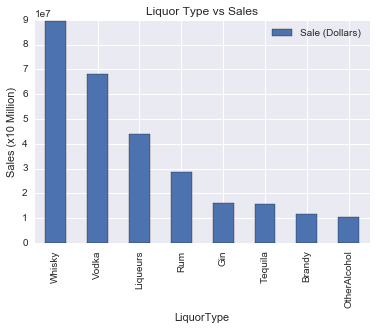

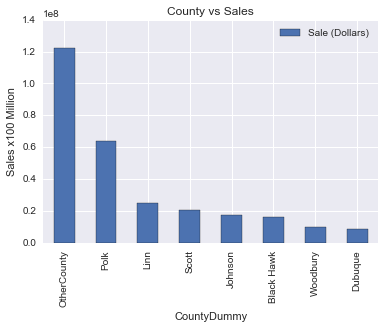

In [12]:
#Pivot tables and bar plots for sales by LiquorType and County for the 2015 year

categorysales2015 = pd.pivot_table(df2015, index = ['LiquorType'], values=['Sale (Dollars)'],
                                   aggfunc=np.sum)
categorysales2015 = categorysales2015.sort_values(['Sale (Dollars)'], ascending = False)
categorysales2015.plot(kind = 'bar')  
plt.ylabel("Sales (x10 Million)")
plt.title('Liquor Type vs Sales')

countysales2015 = pd.pivot_table(df2015, index = ['CountyDummy'], values=['Sale (Dollars)'],aggfunc=np.sum)
countysales2015 = countysales2015.sort_values(['Sale (Dollars)'], ascending = False)
countysales2015.plot(kind = 'bar')
plt.ylabel("Sales x100 Million")
plt.title('County vs Sales')



In [13]:
#prints Total Sales and Volume Sold for Q1 in 2015 and 2016. This is important when looking at predictions for 
#remainder of 2016 to see if regression makes sense.

sales2015Q1 = df2015q1['Sale (Dollars)'].sum()
sales2016Q1 = df2016q1['Sale (Dollars)'].sum()
volume2105Q1 = df2015q1['Volume Sold (Liters)'].sum()
volume2106Q1 = df2016q1['Volume Sold (Liters)'].sum()
sales2015 = df2015['Sale (Dollars)'].sum()
volume2105 = df2015['Volume Sold (Liters)'].sum()


print "2015 Q1 Sales: $%.2f" %sales2015Q1
print "2015 Volume Sold (L) %f" %volume2105Q1
print "\n"
print "2015 Total Sales: $%.2f" %sales2015
print "2015 Total Volume Sold (L) %f" %volume2105
print "\n"
print "2016 Q1 Sales: $%.2f" %sales2016Q1
print "2016 Volume Sold (L) %f" %volume2106Q1

2015 Q1 Sales: $62934674.68
2015 Volume Sold (L) 4392407.320000


2015 Total Sales: $283912803.61
2015 Total Volume Sold (L) 19598071.140002


2016 Q1 Sales: $63633748.83
2016 Volume Sold (L) 4455735.040000


The sales in Q1 increased 1.1% in 2016. This will be important in checking if regression model makes sense.

# Models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [14]:
countysalesmodelq12015 = pd.pivot_table(df2015q1, index = ['County'], values=['Sale (Dollars)','Volume Sold (Liters)','Brandy','Gin','Liqueurs','OtherAlcohol','Rum','Tequila','Vodka','Whisky'],aggfunc=np.sum)
countysalesmodelq12015.head()

,Brandy,Gin,Liqueurs,OtherAlcohol,Rum,Sale (Dollars),Tequila,Vodka,Volume Sold (Liters),Whisky
County,,,,,,,,,,
Adair,50.0,69.0,127.0,40.0,87.0,103556.31,48.0,230.0,8297.97,376.0
Adams,13.0,19.0,87.0,20.0,17.0,20335.03,16.0,60.0,1539.72,126.0
Allamakee,100.0,87.0,395.0,40.0,109.0,155988.96,50.0,347.0,12796.43,456.0
Appanoose,63.0,125.0,425.0,60.0,129.0,151755.48,68.0,399.0,12314.28,560.0
Audubon,35.0,39.0,102.0,17.0,64.0,39274.46,16.0,91.0,3298.56,168.0


In [15]:
countysalesmodel2015 = pd.pivot_table(df2015, index = ['County'], values=['Sale (Dollars)'],aggfunc=np.sum)
countysalesmodel2015.head()

countysalesmodel2015.to_csv('countysales2015.csv')

In [16]:
countysalesmodel2016q1 = pd.pivot_table(df2016q1, index = ['County'], values=['Sale (Dollars)','Volume Sold (Liters)','Brandy','Gin','Liqueurs','OtherAlcohol','Rum','Tequila','Vodka','Whisky'],aggfunc=np.sum)
countysalesmodel2016q1.head()

,Brandy,Gin,Liqueurs,OtherAlcohol,Rum,Sale (Dollars),Tequila,Vodka,Volume Sold (Liters),Whisky
County,,,,,,,,,,
Adair,38.0,68.0,186.0,44.0,102.0,105206.47,68.0,240.0,8262.44,388.0
Adams,23.0,8.0,119.0,13.0,30.0,21834.49,12.0,51.0,1643.87,187.0
Allamakee,162.0,127.0,464.0,62.0,155.0,178736.14,68.0,442.0,14839.15,586.0
Appanoose,59.0,109.0,416.0,80.0,163.0,176583.49,61.0,379.0,13713.39,560.0
Audubon,24.0,32.0,56.0,7.0,43.0,37113.57,13.0,96.0,3426.62,122.0


In [17]:
#Linear Model (final)

lr = linear_model.LinearRegression()
lr_model = lr.fit(countysalesmodelq12015, countysalesmodel2015)
lr_r2 =  r2_score(y_true=countysalesmodel2015, y_pred=lr_model.predict(countysalesmodelq12015))
lr_r2

0.99919308366038251

In [18]:
predictions15 = lr_model.predict(countysalesmodelq12015)
print "2015 Predict from model:   $%.2f" % (predictions15.sum())

2015 Predict from model:   $283912803.61


In [19]:
predictions = lr_model.predict(countysalesmodel2016q1)
print "2016 Predict from Model:   $%.2f" % (predictions.sum())

2016 Predict from Model:   $289355816.10


#### The prediction of Q234 of 2015 above was most accurately modeled by the X1 model which is built from the entire 2015 year. This predicted model is within 1%.

In [20]:
#This runs a lasso linear regression using all of 2015 sales and predicts Q234 2015 sales.

lasso = linear_model.Lasso(alpha=1)
lasso_model = lasso.fit(countysalesmodelq12015, countysalesmodel2015)
lasso_r2 = r2_score(y_true=countysalesmodel2015, y_pred=lasso_model.predict(countysalesmodelq12015))
print "R2: \t \t %f" % (lasso_r2)
print "Mean Coef: \t %f" % (abs(lasso_model.coef_).mean())
print "Y2 Predict: \t $%.2f" % (lasso_model.predict(countysalesmodel2016q1).sum())

R2: 	 	 0.998945
Mean Coef: 	 908.928490
Y2 Predict: 	 $283255021.94


//anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


The lasso model above predicted Q1 2016 sales within 1%.

In [21]:
#Runs Cross Val Score on the linear regression model X1 and lasso regression.

crossvalscorelr = cross_val_score(lr, countysalesmodelq12015, countysalesmodel2015, n_jobs=1, cv=5)
crossvalscorelasso = cross_val_score(lasso, countysalesmodelq12015, countysalesmodel2015, n_jobs=1, cv=5)

print "CrossValScore LR:    %f"%(crossvalscorelr.mean())
print "CrossValScore Lasso: %f"%(crossvalscorelasso.mean())

CrossValScore LR:    0.991344
CrossValScore Lasso: 0.991644


## Results

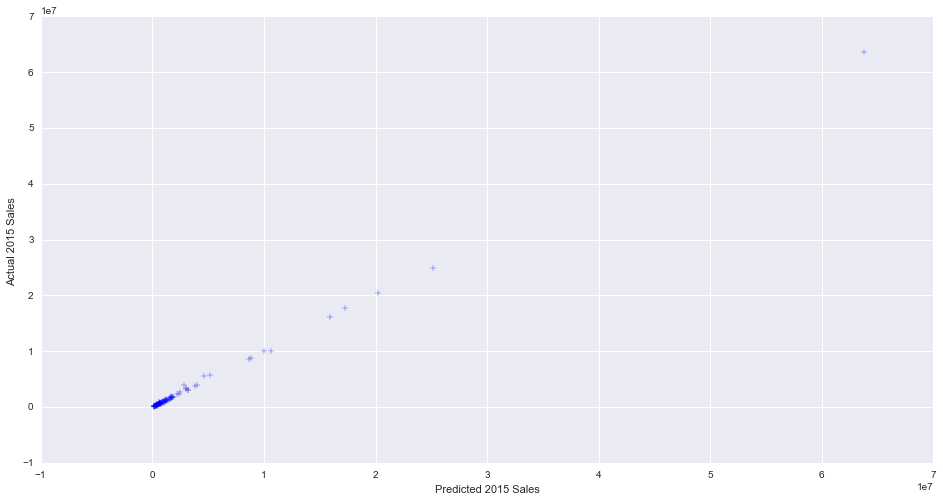

MSE: 44255711909.5


In [22]:
#This plots the predicted values of Q234 2015 against actual values of Q234 2015 using X1 model.

plt.figure(figsize=(16,8))
plt.scatter(predictions15,countysalesmodel2015, s=30, c='b', marker='+', zorder=10)
plt.xlabel("Predicted 2015 Sales")
plt.ylabel("Actual 2015 Sales ")
plt.show()
print "MSE:", mean_squared_error(predictions15,countysalesmodel2015)

# Conclusions


Using alcohol sales data from the entire year 2015 in Iowa, I was able to build a linear regression model to predict revenue based on type of alochol purhcased, location (county), and volume sold in liters.


#### TOTAL 2016 Sales Prediction: $289,355,816.10

